In [1]:
#Install these libraries if you dont have
!pip install xgboost
!pip install graphviz

!pip install pydotplus
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install chart_studio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets, utils, tree
from sklearn.tree import export_graphviz 
#export_graphviz function converts decision tree classifier 
#into dot file and pydotplus convert this dot file to png or displayable form 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from IPython import display
from graphviz import Source
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

c:\python36\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
#Set Seed
np.random.seed(2020)

# Reading the data

In [11]:
gpu_usage =pd.read_csv("sgemm_product.csv")
remove_n = 181000
df = pd.DataFrame(gpu_usage)
drop_indices = np.random.choice(df.index, remove_n, replace=False)
gpu_usage = df.drop(drop_indices)
gpu_usage.shape

(60600, 18)

In [12]:
gpu_usage_1=gpu_usage
gpu_usage_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 4 to 241597
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MWG        60600 non-null  int64  
 1   NWG        60600 non-null  int64  
 2   KWG        60600 non-null  int64  
 3   MDIMC      60600 non-null  int64  
 4   NDIMC      60600 non-null  int64  
 5   MDIMA      60600 non-null  int64  
 6   NDIMB      60600 non-null  int64  
 7   KWI        60600 non-null  int64  
 8   VWM        60600 non-null  int64  
 9   VWN        60600 non-null  int64  
 10  STRM       60600 non-null  int64  
 11  STRN       60600 non-null  int64  
 12  SA         60600 non-null  int64  
 13  SB         60600 non-null  int64  
 14  Run1 (ms)  60600 non-null  float64
 15  Run2 (ms)  60600 non-null  float64
 16  Run3 (ms)  60600 non-null  float64
 17  Run4 (ms)  60600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 8.8 MB


In [13]:
#Calculate the average and setting the average_gpu_usage column
gpu_usage['average_gpu_runtime'] = gpu_usage[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis = 1)
gpu_usage.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
10,16,16,16,8,8,8,8,2,1,1,1,0,1,0,83.48,83.46,84.44,84.38,83.9400
26,16,16,16,8,8,8,8,2,1,2,1,0,1,0,75.40,74.62,75.99,75.84,75.4625
27,16,16,16,8,8,8,8,2,1,2,1,0,1,1,76.73,74.15,76.63,74.84,75.5875
30,16,16,16,8,8,8,8,2,1,2,1,1,1,0,73.58,73.33,74.58,74.82,74.0775
33,16,16,16,8,8,8,8,2,2,1,0,0,0,1,69.36,69.24,70.55,75.21,71.0900
34,16,16,16,8,8,8,8,2,2,1,0,0,1,0,60.26,59.86,62.90,68.01,62.7575
37,16,16,16,8,8,8,8,2,2,1,0,1,0,1,72.82,72.71,73.88,77.96,74.3425
40,16,16,16,8,8,8,8,2,2,1,1,0,0,0,73.16,72.00,72.93,76.60,73.6725
47,16,16,16,8,8,8,8,2,2,1,1,1,1,1,73.44,73.51,72.95,76.49,74.0975


In [14]:
gpu_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 4 to 241597
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60600 non-null  int64  
 1   NWG                  60600 non-null  int64  
 2   KWG                  60600 non-null  int64  
 3   MDIMC                60600 non-null  int64  
 4   NDIMC                60600 non-null  int64  
 5   MDIMA                60600 non-null  int64  
 6   NDIMB                60600 non-null  int64  
 7   KWI                  60600 non-null  int64  
 8   VWM                  60600 non-null  int64  
 9   VWN                  60600 non-null  int64  
 10  STRM                 60600 non-null  int64  
 11  STRN                 60600 non-null  int64  
 12  SA                   60600 non-null  int64  
 13  SB                   60600 non-null  int64  
 14  Run1 (ms)            60600 non-null  float64
 15  Run2 (ms)            60600 non-null

In [15]:
gpu_usage.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
count,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000
mean,80.283036,80.031947,25.512343,13.966337,13.935578,17.378878,17.361848,4.982673,2.455297,2.447211,0.499488,0.500924,0.501848,0.497244,214.874587,214.848033,214.806319,214.797195,214.831533
std,42.493183,42.488894,7.855815,7.931982,7.889504,9.385507,9.391873,2.999975,1.959325,1.957995,0.500004,0.500003,0.500001,0.499997,362.742738,362.467274,362.478831,362.462763,362.532635
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.810000,14.850000,14.880000,14.860000,14.850000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.640000,40.720000,40.670000,40.660000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,69.660000,69.775000,69.580000,69.660000,69.613750
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,227.075000,227.105000,226.975000,227.047500,226.986250
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3333.920000,3375.420000,3354.680000,3353.570000,3339.467500


In [16]:
gpu_usage.shape

(60600, 19)

# training and test split

Text(0.5, 1.0, 'Average gpu runtime distribution')

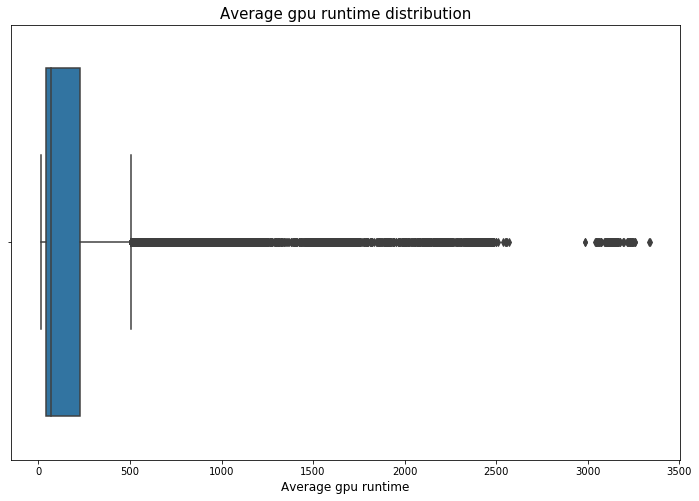

In [18]:
#Visualiztion
# Find outliers
sorted_average_gpu_runtime = gpu_usage.sort_values('average_gpu_runtime',ascending=False)
#print("The number of the 0,1% top values of average gpu usage' load is",
#      len(sorted_average_gpu_runtime.head(len(sorted_average_gpu_runtime)//1000)),"and they have average gpu runtime higher than",
#      sorted_average_gpu_runtime.average_gpu_runtime[19])

# boxplot average_gpu_runtime
plt.figure(figsize=(12,8))
sns.boxplot(x="average_gpu_runtime", data=gpu_usage)
plt.xlabel('Average gpu runtime', fontsize=12)
plt.title("Average gpu runtime distribution", fontsize=15)

In [19]:
# Outliers removal
gpu_usage_a = gpu_usage.drop(gpu_usage[(gpu_usage.average_gpu_runtime>2500)|(gpu_usage.average_gpu_runtime<0)].index)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60472 entries, 4 to 241597
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60472 non-null  int64  
 1   NWG                  60472 non-null  int64  
 2   KWG                  60472 non-null  int64  
 3   MDIMC                60472 non-null  int64  
 4   NDIMC                60472 non-null  int64  
 5   MDIMA                60472 non-null  int64  
 6   NDIMB                60472 non-null  int64  
 7   KWI                  60472 non-null  int64  
 8   VWM                  60472 non-null  int64  
 9   VWN                  60472 non-null  int64  
 10  STRM                 60472 non-null  int64  
 11  STRN                 60472 non-null  int64  
 12  SA                   60472 non-null  int64  
 13  SB                   60472 non-null  int64  
 14  Run1 (ms)            60472 non-null  float64
 15  Run2 (ms)            60472 non-null

In [20]:
gpu_usage_a = gpu_usage_a.drop("Run1 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run2 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run3 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run4 (ms)", axis= 1)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60472 entries, 4 to 241597
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60472 non-null  int64  
 1   NWG                  60472 non-null  int64  
 2   KWG                  60472 non-null  int64  
 3   MDIMC                60472 non-null  int64  
 4   NDIMC                60472 non-null  int64  
 5   MDIMA                60472 non-null  int64  
 6   NDIMB                60472 non-null  int64  
 7   KWI                  60472 non-null  int64  
 8   VWM                  60472 non-null  int64  
 9   VWN                  60472 non-null  int64  
 10  STRM                 60472 non-null  int64  
 11  STRN                 60472 non-null  int64  
 12  SA                   60472 non-null  int64  
 13  SB                   60472 non-null  int64  
 14  average_gpu_runtime  60472 non-null  float64
dtypes: float64(1), int64(14)
memory usa

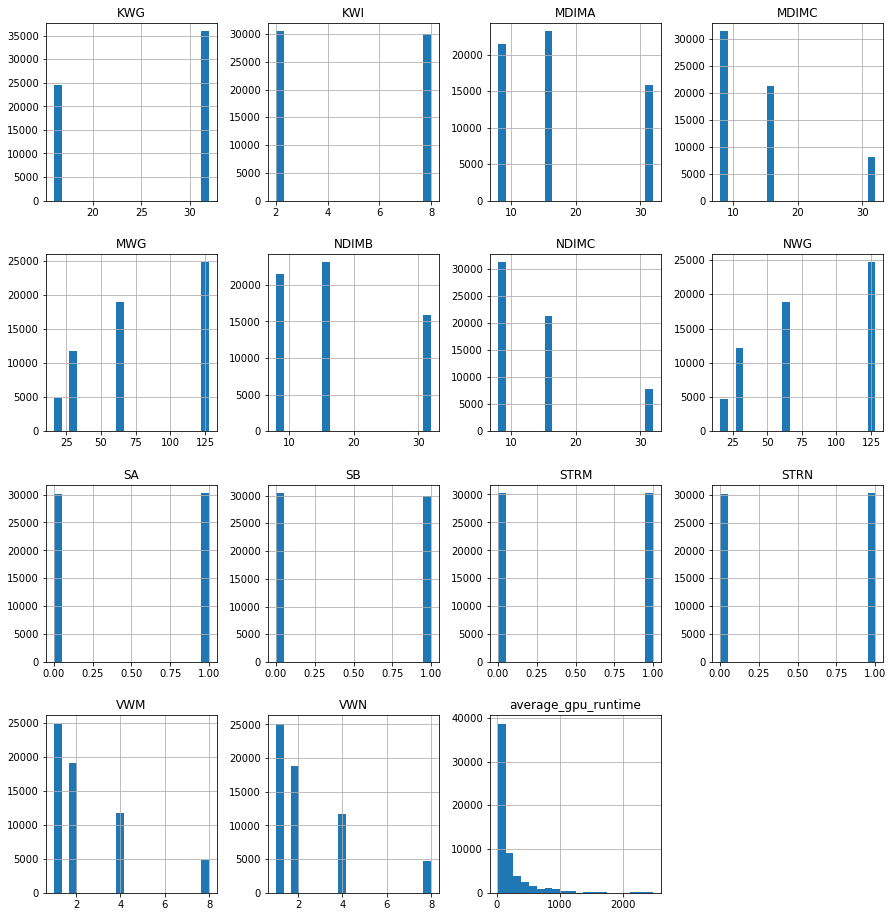

In [21]:
# Histogram of all the features to understand the distribution
gpu_usage_a.hist(bins = 20 , figsize= (15,16)) ;

In [22]:
gpu_usage_a['log_average_gpu_runtime'] = np.log(gpu_usage_a.average_gpu_runtime)

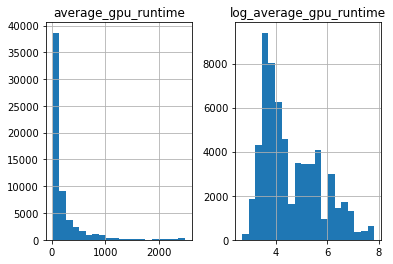

In [23]:
average_gpu_runtime = ["average_gpu_runtime","log_average_gpu_runtime"]
average_gpu_runtime = gpu_usage_a[average_gpu_runtime]
average_gpu_runtime.hist(bins = 20 ) ;

In [24]:
# finding correlatin matrix of all the attributes
gpu_usage_a.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_gpu_runtime,log_average_gpu_runtime
MWG,1.000000,-0.004415,0.005384,0.113088,-0.009315,0.163439,0.013551,-0.005436,0.352118,0.001424,-0.001042,-0.004318,-0.010483,-0.001113,0.352792,0.450727
NWG,-0.004415,1.000000,0.005417,-0.006979,0.102389,0.007256,0.153882,0.001028,-0.002337,0.359548,0.000964,0.001579,0.002226,-0.001339,0.328826,0.347127
KWG,0.005384,0.005417,1.000000,0.149361,0.156558,-0.039580,-0.032084,0.000171,-0.015813,-0.015358,0.002115,0.000777,-0.002794,-0.004705,-0.007737,-0.030786
MDIMC,0.113088,-0.006979,0.149361,1.000000,-0.214965,0.199770,0.091713,-0.002054,-0.133333,0.009312,-0.002478,0.001363,0.000754,-0.002196,-0.223174,-0.247848
NDIMC,-0.009315,0.102389,0.156558,-0.214965,1.000000,0.079694,0.190762,0.002179,0.006181,-0.133829,-0.000032,0.001495,0.003061,0.003512,-0.215020,-0.237942
MDIMA,0.163439,0.007256,-0.039580,0.199770,0.079694,1.000000,0.090993,0.002270,-0.204690,-0.021668,-0.001626,0.005947,-0.007902,-0.004775,-0.007129,-0.022025
NDIMB,0.013551,0.153882,-0.032084,0.091713,0.190762,0.090993,1.000000,-0.000982,-0.023081,-0.205018,0.005023,-0.000141,-0.002399,-0.000442,-0.010146,-0.035262
KWI,-0.005436,0.001028,0.000171,-0.002054,0.002179,0.002270,-0.000982,1.000000,-0.004782,0.003955,-0.001298,-0.005444,-0.004618,-0.009617,0.021216,-0.014881
VWM,0.352118,-0.002337,-0.015813,-0.133333,0.006181,-0.204690,-0.023081,-0.004782,1.000000,0.005399,0.008606,-0.000904,-0.001846,0.005512,0.168524,0.209625
VWN,0.001424,0.359548,-0.015358,0.009312,-0.133829,-0.021668,-0.205018,0.003955,0.005399,1.000000,-0.006164,0.004257,0.000661,-0.001615,0.148706,0.150030


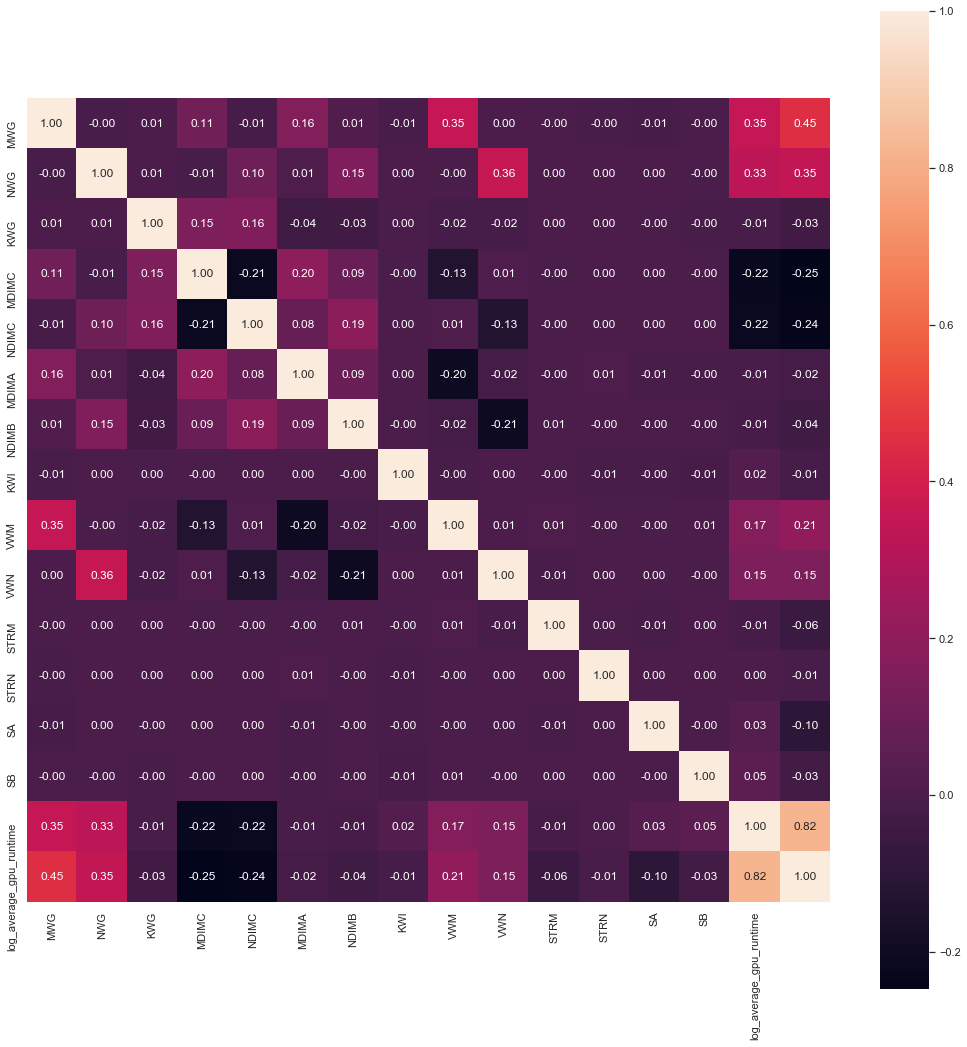

In [25]:
#Ploting correlation matrix
col = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_average_gpu_runtime']
corr = gpu_usage_a.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

# Checking for multi collinearity

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(gpu_usage, 40))

Top Absolute Correlations
Run4 (ms)  average_gpu_runtime    0.999991
Run2 (ms)  average_gpu_runtime    0.999991
Run3 (ms)  average_gpu_runtime    0.999990
           Run4 (ms)              0.999982
Run2 (ms)  Run4 (ms)              0.999982
           Run3 (ms)              0.999982
Run1 (ms)  average_gpu_runtime    0.999970
           Run4 (ms)              0.999942
           Run2 (ms)              0.999941
           Run3 (ms)              0.999940
NWG        VWN                    0.359384
MWG        VWM                    0.351947
           Run4 (ms)              0.346804
           Run3 (ms)              0.346763
           Run2 (ms)              0.346748
           average_gpu_runtime    0.346691
           Run1 (ms)              0.346428
NWG        Run3 (ms)              0.324612
           Run4 (ms)              0.324534
           average_gpu_runtime    0.324521
           Run2 (ms)              0.324497
           Run1 (ms)              0.324424
MDIMC      Run1 (ms)        

In [27]:
gpu_usage_a[gpu_usage_a.columns[:]].corr()['log_average_gpu_runtime'][:]

MWG                        0.450727
NWG                        0.347127
KWG                       -0.030786
MDIMC                     -0.247848
NDIMC                     -0.237942
MDIMA                     -0.022025
NDIMB                     -0.035262
KWI                       -0.014881
VWM                        0.209625
VWN                        0.150030
STRM                      -0.056413
STRN                      -0.007625
SA                        -0.097807
SB                        -0.028147
average_gpu_runtime        0.823777
log_average_gpu_runtime    1.000000
Name: log_average_gpu_runtime, dtype: float64

# Column management

In [28]:
feature_b=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN']
feature_1b = gpu_usage_a[feature_b]


In [29]:
gpu_usage_a['average_gpu_runtime_Class'] = np.where(gpu_usage_a['average_gpu_runtime']>=70, 1, 0)
gpu_usage_a['average_gpu_runtime_Class'] = gpu_usage_a['average_gpu_runtime_Class'].astype('category')

In [30]:
target_2 = gpu_usage_a['average_gpu_runtime_Class']
target_2.head()

4     1
10    1
26    1
27    1
30    1
Name: average_gpu_runtime_Class, dtype: category
Categories (2, int64): [0, 1]

In [31]:
avg_gpu_usage_x = ['average_gpu_runtime_Class']
target_x = gpu_usage_a[avg_gpu_usage_x]

In [32]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(feature_1b, target_x, test_size = 0.4, random_state = 0)

# Scaling

In [33]:
scaler = StandardScaler() 
  
# To scale data 
X_trainS=scaler.fit_transform(X_trainS)
X_testS=scaler.transform(X_testS)
#y_trainS = scaler.fit_transform(y_trainS)
#y_testS=scaler.transform(y_testS)

# SVM - linear kernal

In [34]:
# defining parameter range 
param_grid_l = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear']}  
  
grid_l = GridSearchCV(SVC(), param_grid=param_grid_l, refit = True, verbose = 2,return_train_score=True) 
  


In [35]:
# fitting the model for grid search 
grid_l.fit(X_trainS, y_trainS)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=  15.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=  17.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=  17.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=  19.8s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=  22.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  17.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  16.5s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=  15.9s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 40.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [36]:
# print best parameter after tuning 
print(grid_l.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_l.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [37]:
# Evaluate train set accuracy
train_acc1 = grid_l.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc1))

Train set accuracy of best model: 0.827


In [38]:
grid_predictions_l = grid_l.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_l))
# print classification report 

print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_l ))
print(classification_report(y_testS, grid_predictions_l))

[[10515  1624]
 [ 2473  9577]]
Accuracy: 0.8306254909256273
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     12139
           1       0.86      0.79      0.82     12050

    accuracy                           0.83     24189
   macro avg       0.83      0.83      0.83     24189
weighted avg       0.83      0.83      0.83     24189



In [39]:
print("Train Error",1-train_acc1)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_l ))

Train Error 0.172642835487694
Test Error 0.16937450907437268


# Gaussian Kernal

In [40]:
# defining parameter range 
param_grid_g = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
grid_g = GridSearchCV(SVC(), param_grid=param_grid_g, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_g.fit(X_trainS, y_trainS)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  41.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.8s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  42.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  41.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  41.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  42.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  21.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  22.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  21.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 32.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [41]:
# print best parameter after tuning 
print(grid_g.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_g.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [42]:
# Evaluate train set accuracy
train_acc2 = grid_g.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc2))

Train set accuracy of best model: 0.922


In [43]:
grid_predictions_g = grid_g.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_g))
# print classification report 
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_g ))
print(classification_report(y_testS, grid_predictions_g))

[[11303   836]
 [ 1528 10522]]
Accuracy: 0.9022696266898177
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12139
           1       0.93      0.87      0.90     12050

    accuracy                           0.90     24189
   macro avg       0.90      0.90      0.90     24189
weighted avg       0.90      0.90      0.90     24189



In [44]:
print("Train Error",1-train_acc2)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_g ))

Train Error 0.07772234930959399
Test Error 0.0977303733101823


# Polynomial kernal

In [45]:
# defining parameter range 
param_grid_s = {'C': [0.1, 1, 10], 'degree':[2,3], 
              'gamma': [0.1, 0.01], 
              'kernel': ['poly']}  
  
grid_s = GridSearchCV(SVC(), param_grid=param_grid_s, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_s.fit(X_trainS, y_trainS)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, degree=2, gamma=0.1, kernel=poly, total=  21.5s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s remaining:    0.0s


[CV] .......... C=0.1, degree=2, gamma=0.1, kernel=poly, total=  21.4s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=2, gamma=0.1, kernel=poly, total=  22.0s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=2, gamma=0.1, kernel=poly, total=  21.5s
[CV] C=0.1, degree=2, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=2, gamma=0.1, kernel=poly, total=  21.6s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=2, gamma=0.01, kernel=poly, total=  28.9s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=2, gamma=0.01, kernel=poly, total=  28.5s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=2, gamma=0.01, kernel=poly, total=  28.6s
[CV] C=0.1, degree=2, gamma=0.01, kernel=poly ........................
[CV] .

[CV] .......... C=10, degree=3, gamma=0.01, kernel=poly, total=  21.6s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 26.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.1, 0.01], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [46]:
# print best parameter after tuning 
print(grid_s.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_s.best_estimator_)

{'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [47]:
# Evaluate train set accuracy
train_acc3 = grid_s.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc3))

Train set accuracy of best model: 0.884


In [48]:
grid_predictions_s = grid_s.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_s))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_s ))
print(classification_report(y_testS, grid_predictions_s))

[[11133  1006]
 [ 1893 10157]]
Accuracy: 0.8801521352680971
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     12139
           1       0.91      0.84      0.88     12050

    accuracy                           0.88     24189
   macro avg       0.88      0.88      0.88     24189
weighted avg       0.88      0.88      0.88     24189



In [49]:
print("Train Error",1-train_acc3)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_s ))

Train Error 0.11592205716175619
Test Error 0.1198478647319029


# Descision tree

In [50]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_trainS,y_trainS)

In [51]:
# Evaluate train set accuracy
train_acc4 = clf1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc4))

Train set accuracy of best model: 0.973


In [52]:
#Predict the response for test dataset
y_pred_nt = clf1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_nt))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_nt ))
print(classification_report(y_testS, y_pred_nt))

[[10824  1315]
 [ 1554 10496]]
Accuracy: 0.8813923684319319
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12139
           1       0.89      0.87      0.88     12050

    accuracy                           0.88     24189
   macro avg       0.88      0.88      0.88     24189
weighted avg       0.88      0.88      0.88     24189



In [53]:
print("Train Error",1-train_acc4)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_nt ))

Train Error 0.02747843342612244
Test Error 0.11860763156806808


# Pruned tree using hyperparameter tuning

In [55]:
param_grid_dt= {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20]
              }

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, refit = True, verbose = 2) 

In [56]:
grid_dt.fit(X_trainS, y_trainS)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None,

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_le

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=Non

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=Non

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_sam

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=Non

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_sp

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_l

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0

[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None,

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_dept

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_sa

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_n

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, m

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_le

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, total=   0.1s
[CV] cr

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, m

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_dept

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:   53.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [57]:
# print best parameter after tuning 
print(grid_dt.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_dt.best_estimator_)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'min_samples_split': 20}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [58]:
clf2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf2 = clf2.fit(X_trainS,y_trainS)

In [59]:
# Evaluate train set accuracy
train_acc5 = clf2.score(X_trainS,y_trainS)
print("Test set accuracy of best model: {:.3f}".format(train_acc5))

Test set accuracy of best model: 0.695


In [60]:
grid_predictions_dt = clf2.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_dt))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_dt ))
print(classification_report(y_testS, grid_predictions_dt))

[[9522 2617]
 [4702 7348]]
Accuracy: 0.6974244491297698
              precision    recall  f1-score   support

           0       0.67      0.78      0.72     12139
           1       0.74      0.61      0.67     12050

    accuracy                           0.70     24189
   macro avg       0.70      0.70      0.69     24189
weighted avg       0.70      0.70      0.70     24189



In [61]:
print("Train Error",1-train_acc5)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_dt ))

Train Error 0.3052669294159799
Test Error 0.30257555087023025


# XG boost

In [63]:
estimator = XGBClassifier(
    objective= 'binary:logistic', 
    nthread=4,
    seed=42)

In [64]:
# fit model no training data

xg1=estimator.fit(X_trainS, y_trainS)
train_acc6 = xg1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc6))

Train set accuracy of best model: 0.930


In [65]:
#Predict the response for test dataset
y_pred_xg1 = xg1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg1))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg1 ))
print(classification_report(y_testS, y_pred_xg1))

[[11219   920]
 [ 1399 10651]]
Accuracy: 0.9041299764355699
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12139
           1       0.92      0.88      0.90     12050

    accuracy                           0.90     24189
   macro avg       0.90      0.90      0.90     24189
weighted avg       0.90      0.90      0.90     24189



In [66]:
print("Train Error",1-train_acc6)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg1 ))

Train Error 0.07025328666317554
Test Error 0.09587002356443008


# Hyperparameter tuning using randomized search

In [67]:
parameters = {
    'max_depth': [2,3,5,10],
    'n_estimators': [100,500,1000],
    'learning_rate': [0.01,0.005,0.001],
    'min_child_weight': [1,5],
    'eta':[.3],
    'gamma': [0,1,5]
}

In [68]:
grid_xgb = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    verbose=True
)

In [69]:
grid_xgb.fit(X_trainS, y_trainS)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=10...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_

In [70]:
# print best parameter after tuning 
print(grid_xgb.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_xgb.best_estimator_)

{'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.001, 'gamma': 1, 'eta': 0.3}
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [71]:
xgb1=XGBClassifier(booster='gbtree', gamma=5,n_estimators=1000)
xgb1=xgb1.fit(X_trainS,y_trainS)

In [72]:
# Evaluate train set accuracy
train_acc7 = grid_xgb.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc7))


Train set accuracy of best model: 0.978


In [73]:
#Predict the response for test dataset
y_pred_xg2 = grid_xgb.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg2))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg2))
print(classification_report(y_testS, y_pred_xg2))

[[11171   968]
 [ 1344 10706]]
Accuracy: 0.904419364173798
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12139
           1       0.92      0.89      0.90     12050

    accuracy                           0.90     24189
   macro avg       0.90      0.90      0.90     24189
weighted avg       0.90      0.90      0.90     24189



In [74]:
print("Train Error",1-train_acc7)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg2 ))

Train Error 0.02187198312418359
Test Error 0.09558063582620202


# Learning curves

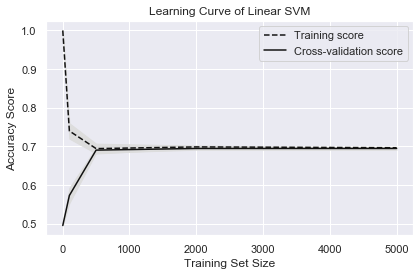

In [75]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Linear SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

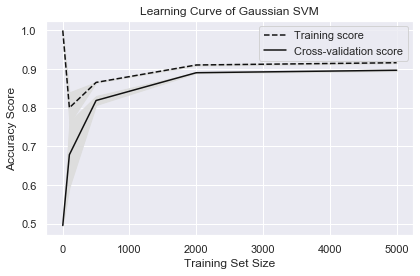

In [76]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Gaussian SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

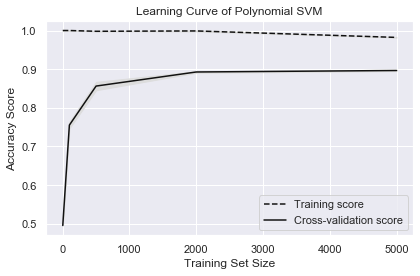

In [77]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Polynomial SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

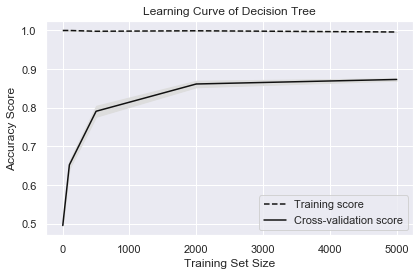

In [78]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

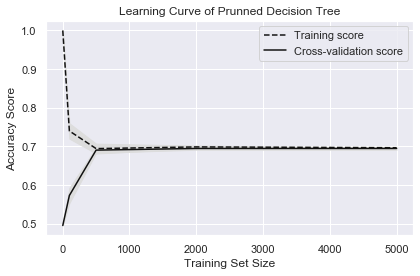

In [79]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

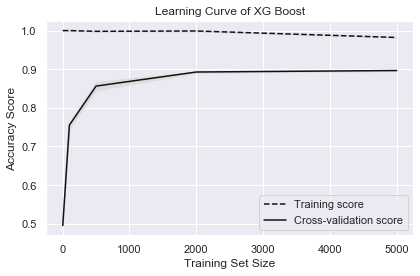

In [80]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

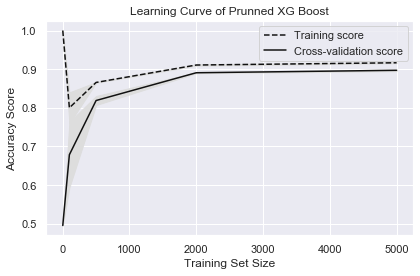

In [81]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()